In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500)

%matplotlib inline 

In [2]:
url = "https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_cleaned/df_pt_1%262_ABC.csv"

In [3]:
dt = pd.read_csv(url)

In [4]:
dt.shape #(rows:317,235, columns:12)

(317235, 11)

In [5]:
dt.head(3)

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017,4,17,15:27:07,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017,4,17,15:26:51,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017,4,17,15:19:22,Test


In [6]:
dt.nunique()

Unnamed: 0      317235
client_id        50500
visitor_id       56011
visit_id         69205
process_step         5
date_time       283344
year                 1
month                4
day                 31
time             69704
Variation            2
dtype: int64

In [7]:
dt = dt[dt["Variation"] != "Control"] #Data Frame only for TEST GROUP

In [8]:
dt.shape #(rows: 176,699, columns:11)

(176699, 11)

In [9]:
dt_steps = dt.groupby(["client_id"])[["process_step"]].count()

In [10]:
dt_steps

,process_step
client_id,
555,5
647,5
934,4
1336,7
1346,10
...,...
9999150,3
9999400,5
9999626,2


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_22855/991657048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dt_steps, x='process_step', palette="Set3")


<Axes: xlabel='process_step', ylabel='count'>

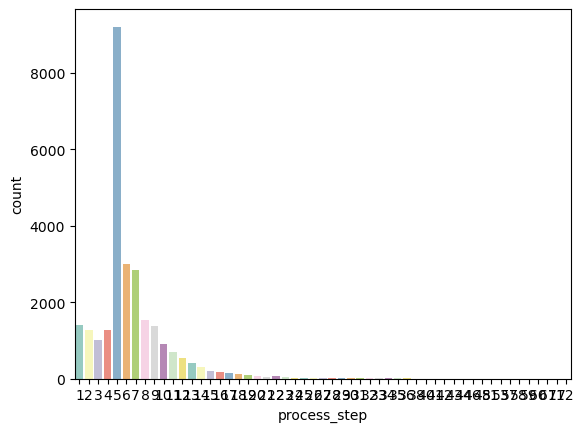

In [11]:
sns.countplot(data = dt_steps, x='process_step', palette="Set3")

In [12]:
pivot_steps_clients = pd.pivot_table(dt, values = "Variation" , index= ["client_id"] , columns = ["process_step"], aggfunc = "count", fill_value=0, margins = True, margins_name = 'Total')

In [13]:
pivot_steps_clients 

process_step,confirm,start,step_1,step_2,step_3,Total
client_id,,,,,,
555,1,1,1,1,1,5
647,1,1,1,1,1,5
934,0,4,0,0,0,4
1336,3,1,1,1,1,7
1346,0,5,2,1,2,10
...,...,...,...,...,...,...
9999400,1,1,1,1,1,5
9999626,0,1,1,0,0,2
9999729,1,4,3,2,1,11


In [14]:
new_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reordenar columnas
pivot_steps_clients  = pivot_steps_clients [new_order]

In [15]:
pivot_steps_clients 

process_step,start,step_1,step_2,step_3,confirm
client_id,,,,,
555,1,1,1,1,1
647,1,1,1,1,1
934,4,0,0,0,0
1336,1,1,1,1,3
1346,5,2,1,2,0
...,...,...,...,...,...
9999400,1,1,1,1,1
9999626,1,1,0,0,0
9999729,4,3,2,1,1


In [16]:
# Agregar total por columnas
pivot_steps_clients['Total'] = pivot_steps_clients.sum(axis=1)

In [17]:
pivot_steps_clients

process_step,start,step_1,step_2,step_3,confirm,Total
client_id,,,,,,
555,1,1,1,1,1,5
647,1,1,1,1,1,5
934,4,0,0,0,0,4
1336,1,1,1,1,3,7
1346,5,2,1,2,0,10
...,...,...,...,...,...,...
9999400,1,1,1,1,1,5
9999626,1,1,0,0,0,2
9999729,4,3,2,1,1,11


In [18]:
dt["process_step"].value_counts()

process_step
start      55773
step_1     38666
step_2     30899
step_3     25761
confirm    25600
Name: count, dtype: int64

In [19]:
pivot_steps_visit = pd.pivot_table(dt, values = "Variation" , index= ["visit_id"] , columns = ["process_step"], aggfunc = "count", fill_value=0, margins = True, margins_name = 'Total')

In [20]:
pivot_steps_visit

process_step,confirm,start,step_1,step_2,step_3,Total
visit_id,,,,,,
100012776_37918976071_457913,2,0,0,0,0,2
100019538_17884295066_43909,1,3,4,2,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,1,3,2,2,9
...,...,...,...,...,...,...
999971096_28827267783_236076,1,1,2,1,1,6
999976049_95772503197_182554,1,1,1,1,2,6
999984454_18731538378_781808,1,1,1,1,1,5


In [21]:
new_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reordenar columnas
pivot_steps_visit  = pivot_steps_visit[new_order]

In [ ]:
valid_visits = dt[dt["process_step"].isin(new_order)]
valid_visits.shape

In [23]:
pivot_steps_visit

process_step,start,step_1,step_2,step_3,confirm
visit_id,,,,,
100012776_37918976071_457913,0,0,0,0,2
100019538_17884295066_43909,3,4,2,1,1
100022086_87870757897_149620,1,1,1,1,1
100173292_91322748906_143563,1,1,1,1,1
100217156_67053490690_383412,1,3,2,2,1
...,...,...,...,...,...
999971096_28827267783_236076,1,2,1,1,1
999976049_95772503197_182554,1,1,1,2,1
999984454_18731538378_781808,1,1,1,1,1


In [24]:
pivot_steps_visit['Total'] = pivot_steps_visit.sum(axis=1)

In [25]:
pivot_steps_visit

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100012776_37918976071_457913,0,0,0,0,2,2
100019538_17884295066_43909,3,4,2,1,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,3,2,2,1,9
...,...,...,...,...,...,...
999971096_28827267783_236076,1,2,1,1,1,6
999976049_95772503197_182554,1,1,1,2,1,6
999984454_18731538378_781808,1,1,1,1,1,5


In [44]:
rows_start_zero = (pivot_steps_visit["start"] == 0)
rows_start_zero 

visit_id
100012776_37918976071_457913     True
100019538_17884295066_43909     False
100022086_87870757897_149620    False
100173292_91322748906_143563    False
100217156_67053490690_383412    False
                                ...  
999971096_28827267783_236076    False
999976049_95772503197_182554    False
999984454_18731538378_781808    False
999988789_76411676596_272843    False
Total                           False
Name: start, Length: 37137, dtype: bool

In [45]:
piv_steps_total = pivot_steps_visit.drop(pivot_steps_visit[rows_start_zero].index)

In [46]:
piv_steps_total

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100019538_17884295066_43909,3,4,2,1,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,3,2,2,1,9
100221419_95702886123_228743,1,0,0,0,0,1
...,...,...,...,...,...,...
999971096_28827267783_236076,1,2,1,1,1,6
999976049_95772503197_182554,1,1,1,2,1,6
999984454_18731538378_781808,1,1,1,1,1,5


In [51]:
total_users = len(piv_steps_total["confirm"])
total_users

33158

In [32]:
# Identificar filas que contienen al menos un valor igual a cero
rows_with_zero = (pivot_steps_visit == 0).any(axis=1)
rows_with_zero 

visit_id
100012776_37918976071_457913     True
100019538_17884295066_43909     False
100022086_87870757897_149620    False
100173292_91322748906_143563    False
100217156_67053490690_383412    False
                                ...  
999971096_28827267783_236076    False
999976049_95772503197_182554    False
999984454_18731538378_781808    False
999988789_76411676596_272843     True
Total                           False
Length: 37137, dtype: bool

In [34]:
# Eliminar esas filas
piv_steps = pivot_steps_visit.drop(pivot_steps_visit[rows_with_zero].index)

piv_steps  #17846 rows × 6 columns:  17846 TOTAL USERS WITH "CONFIRM" AND NO empty ROWS IN OTHER STEPS

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100019538_17884295066_43909,3,4,2,1,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,3,2,2,1,9
100258507_71262593004_214494,7,3,1,1,3,15
...,...,...,...,...,...,...
999958344_67534252886_39917,1,1,1,1,2,6
999971096_28827267783_236076,1,2,1,1,1,6
999976049_95772503197_182554,1,1,1,2,1,6


In [48]:
confirm = len(piv_steps["confirm"])
confirm

17846

In [56]:
completion_test = round((confirm/total_users)*100,2)

In [57]:
completion_test

53.82

In [ ]:
# MISSING HERE: CALCULATE THE SAME FOR CONTROL GROUP AND CLEAN THIS FILE FOR LAST VERSION, ERASE WHAT WE DON'T NEED!

In [29]:
pivot_steps_visit.confirm.unique()

array([    2,     1,     0,     3,     4,     6,     5,     7,    11,
           8,     9,    10, 25600])

In [26]:
len(pivot_steps_visit[pivot_steps_visit["confirm"] != 0 & pivot_steps_visit["confirm"] >= 5].values)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
df_confirmed = pivot_steps_visit[(pivot_steps_visit["confirm"] != 0) & (pivot_steps_visit["confirm"] >= 5)]

In [28]:
df_confirmed

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
114108029_90884488662_445410,1,2,2,1,6,12
128795036_46171740408_932725,1,1,1,1,5,9
134293461_49782153895_902734,1,1,1,1,5,9
136092722_61943545956_156675,2,1,1,1,5,10
136451370_24897002575_792356,1,1,1,1,6,10
136590192_70025227803_624445,1,1,1,1,5,9
147461169_15359424251_954069,0,0,0,0,7,7
155305468_93296256914_310722,0,0,0,0,11,11
155912354_31495583806_146744,4,2,2,1,8,17


In [ ]:
confirm = len(pivot_steps_visit[pivot_steps_visit["confirm"] != 0 ].values)

In [ ]:
total_t = len(pivot_steps_visit["confirm"].values)

In [ ]:
# Note for improvement KPI completion rate: the cells from other steps should be at least NOT EMPTY